Import Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import folium

In [29]:
# read csv file and save into dataframe df
df = pd.read_csv("Airbnb Listings Bangkok Clean.csv")
df.head()

,Unnamed: 0,id,host_id,neighbourhood,region,room_type,price,minimum_nights,reviews_count_bc,reviews_activity,reviews_month_bc,reviews_engagement
0,0,27934,120437,Ratchathewi,Central,Entire home/apt,1905,3,2.928458,High,0.301359,Moderate
1,1,959254,5153476,Khlong Toei,Central,Entire home/apt,1400,30,0.000000,Low,0.000000,Low
2,2,1791481,9399478,Khlong Toei,Central,Entire home/apt,1577,30,3.010781,High,0.381783,High
3,3,1793000,9407280,Vadhana,Central,Entire home/apt,5034,21,3.529709,High,0.557674,High
4,4,1808600,9478184,Khlong Toei,Central,Entire home/apt,2078,60,3.038267,High,0.374712,High


Text(0.5, 1.0, 'Mean Price of Room Types by Region')

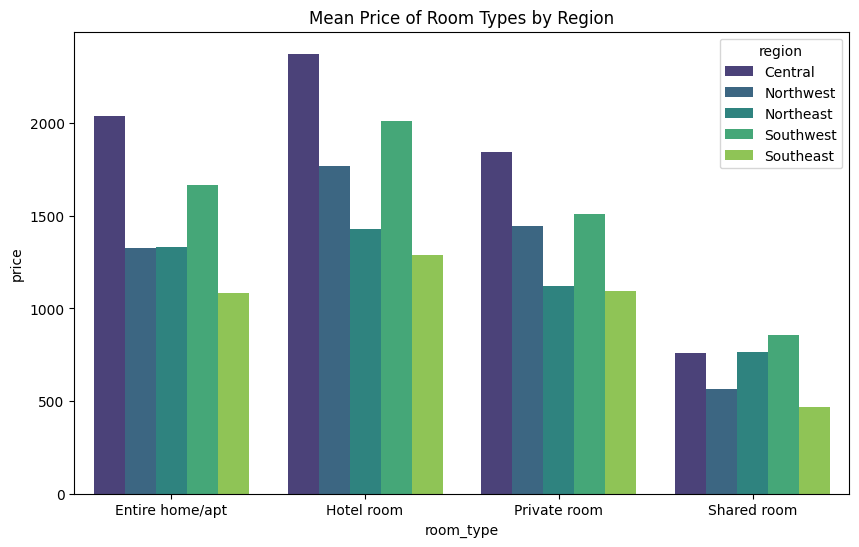

In [10]:
# bar graph showing the difference in price for each room_type in the different regions
plt.figure(figsize=(10, 6))
sns.barplot(x = "room_type", y = "price", data = df, hue = "region", estimator=np.mean, errorbar= None, palette="viridis")
plt.title("Mean Price of Room Types by Region")

In [7]:
# separate dataframes into different room_type
eha_df = df[df["room_type"] == "Entire home/apt"]
hr_df = df[df["room_type"] == "Hotel room"]
pr_df = df[df["room_type"] == "Private room"]
sr_df = df[df["room_type"] == "Shared room"]

### Entire home/apt

In [11]:
eha_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,region
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Central
1,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.71516,100.56806,Entire home/apt,1400,30,0,No Review,0.00,1,365,0,Central
2,1791481,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.70719,100.59936,Entire home/apt,1577,30,78,2019-05-31,0.78,1,330,0,Central
3,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.74668,100.56137,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3,Central
4,1808600,Contemporary Modern Duplex-Thong Lo,9478184,Shine,Khlong Toei,13.72097,100.57823,Entire home/apt,2078,60,83,2018-09-12,0.75,1,55,0,Central


Text(0.5, 1.0, 'Mean Price of Entire Home/Apt by Region')

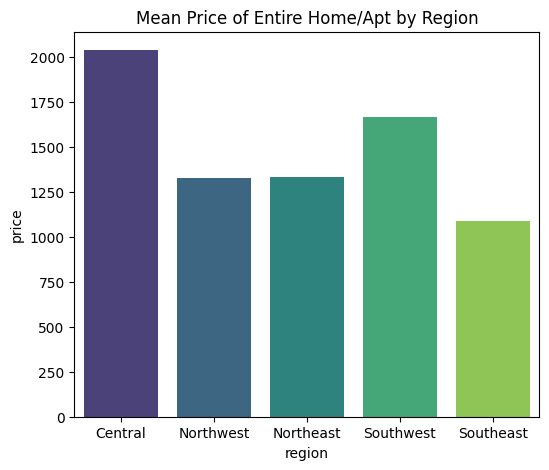

In [15]:
plt.figure(figsize=(6, 5))
sns.barplot(x = "region", y = "price", data = eha_df, hue = "region", estimator=np.mean, errorbar= None, palette="viridis")
plt.title("Mean Price of Entire Home/Apt by Region")

Text(0.5, 1.0, 'Relationship Between Number of Reviews and Price for Entire Home/Apt by Region')

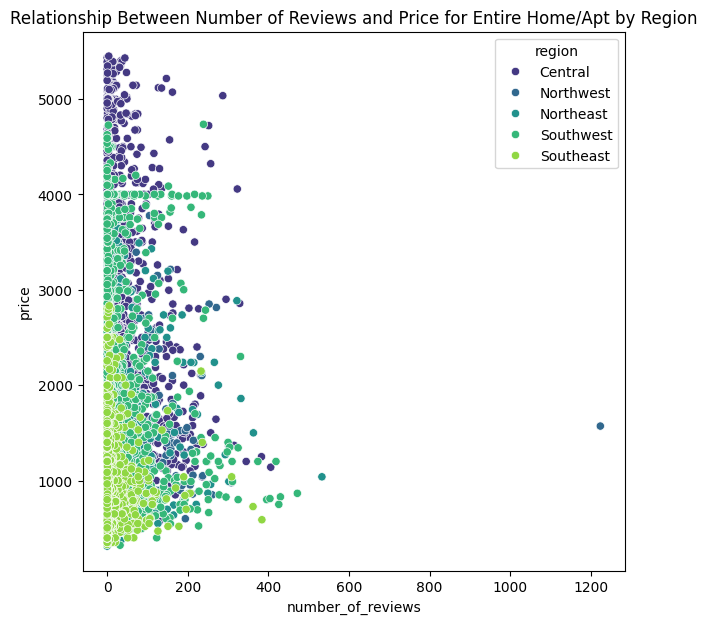

In [20]:
# scatter plot to see the relationship between number_od_reviews and price for entire home/apt by region
plt.figure(figsize=(7, 7))
sns.scatterplot(x = "number_of_reviews", y = "price", data = eha_df, hue = "region", palette="viridis")
plt.title("Relationship Between Number of Reviews and Price for Entire Home/Apt by Region")

In [17]:
eha_df[eha_df["number_of_reviews"] > 800]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,region
5526,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109,Northwest


Text(0.5, 1.0, 'Relationship Between Reviews per Month and Price for Entire Home/Apt by Region')

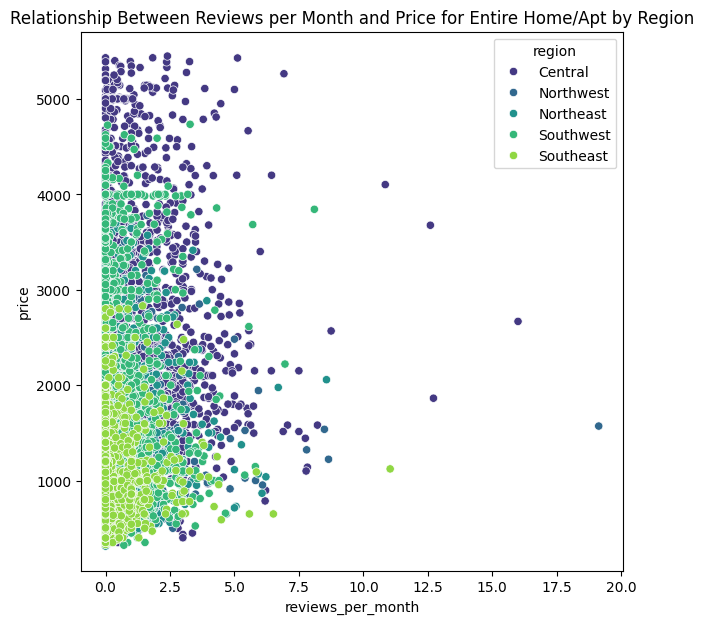

In [21]:
# scatter plot to see the relationship between reviews_per_month and price for entire home/apt by region
plt.figure(figsize=(7, 7))
sns.scatterplot(x = "reviews_per_month", y = "price", data = eha_df, hue = "region", palette="viridis")
plt.title("Relationship Between Reviews per Month and Price for Entire Home/Apt by Region")

Text(0.5, 1.0, 'Count of Number of Reviews for Entire Home/Apt by Region')

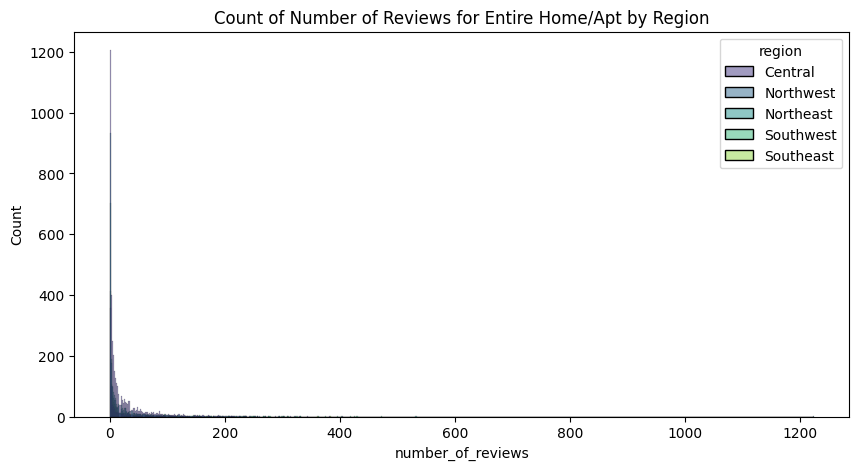

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(x = "number_of_reviews", data = eha_df, hue = "region", palette="viridis")
plt.title("Count of Number of Reviews for Entire Home/Apt by Region")

In [ ]:
# categorizing number of reviews